The $k$-Means Algorithm
====================

Let's start by generating some artificial blobs of data:

In [10]:
from sklearn.datasets import make_blobs

num_blobs = 8
X, Y = make_blobs(centers=num_blobs, cluster_std=0.5, random_state=2)

### As usual, we first *plot* the data to get a feeling of what we're dealing with:

In [1]:
# TODO - plot the data

### The data looks like it may contain four different "clusters".   In fact, this is how it was created above.  We can plot this information as well, using color:

In [2]:
# TODO - plot with colors!

Normally, you do not know the information in `Y`, however.

You could try to recover it from the data alone.

This is what the kMeans algorithm does. 

### Check out the docs on sklearn's [Kmeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

##### class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True, verbose=0, random_state=None, copy_x=True, n_jobs=1)

In [3]:
from sklearn.cluster import KMeans
# TODO - fit, and report the y values predicted

### Now the label assignments should be quite similar to `Y`, up to a different ordering of the colors:

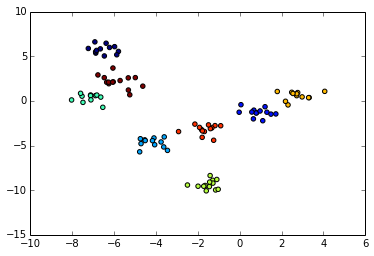

In [15]:
# TODO - plot with colors, based on PREDICTIONS

### Often, you're not so much interested in the assignments to the centroids (means).   You'll want to have a closer look at the centroids themselves.  The centroids can be seen as *representatives* of their respective cluster.

In [4]:
# TODO find the centroids: ctroids = ...
# then use this to plot them:
# plt.scatter(ctroids[:,0], ctroids[:,1], s=100, c=np.unique(Y_hat))


## Let's try to find an ideal value of K using the elbow method

In [17]:
K = range(1,20)

inertias = []
for k in K:
    # create a new KMeans object for each value of k
    kmeans = KMeans(n_clusters=k, random_state=8)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_) # inertia: Sum of distances of samples to their closest cluster center
    

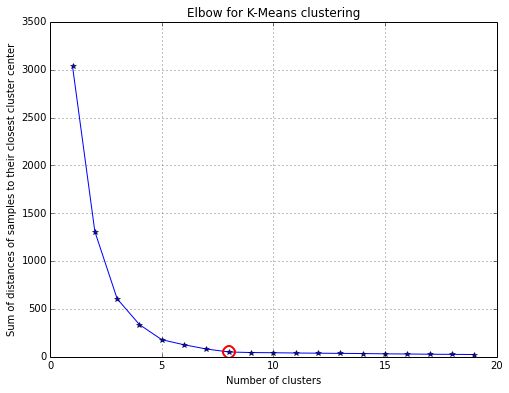

In [18]:
ideal_k = num_blobs -1 # (we know in advance that this is the ideal value for k)

# plot elbow curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(K, inertias, 'b*-')

# plot the red circle
ax.plot(K[ideal_k], inertias[ideal_k], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of distances of samples to their closest cluster center')
tt = plt.title('Elbow for K-Means clustering')  